# Coding for Artificial Intelligence (Day2)



## เนื้อหา
- The Neural Network
- Perceptron
- Mult-layer Perceptron
- Network Optimization
- Tensorflow and Keras
- Shallow Network
- Deep Neural Network
- Other purposes for using Neural Network
- อื่นๆเกี่ยวกับ Neural Network

## The Neural Network

### แรงบันดาลใจทางชีวภาพ

![alt text](https://docs.google.com/uc?export=download&id=1cBX3h4jmwkKCbHwOQdNcG4Dp_eaWXLZP)

- ส่วนประกอบทั่วไปของเซลล์ประสาท
- Dendrite: ทำหน้าที่รับข้อมูล
- Cell body: ทำหน้าที่ประมวลผล
- Axon: ทำหน้าที่เป็นทางผ่านของข้อมูล
- Synaptic terminal: ทำหน้าที่ส่งข้อมูลออกไปยังเซลล์อื่น

- โมเดลทางคณิตศาสตร์ของ biological neuron ซึ่งเรียกว่า Perceptron

![alt text](https://docs.google.com/uc?export=download&id=1rvgXNYoXEGbACYzwxA_MWDg5VAskPbYq)

- จากโมเดลด้านบน เราจะเห็นว่า การทำงานของ Perceptron นั้น เรียบง่ายมากคือ
 1. นำเอาข้อมูล Input คูณด้วยค่า weight
  2. นำค่าที่ได้ มารวมกัน
  3. นำผลรวมนั้น ผ่าน activation function แล้วทำการส่งออกเป็น output
  
 - หรือ $$output = f(\sum_{i=1}^n x_iw_i)$$

##Perceptron

- นอกจาก Perceptron ที่แสดงในหัวข้อก่อนหน้าแล้ว เรายังสามารถเพิ่มความสามารถในการทำงานของ Perceptron ได้โดย เพิ่มค่า bias ให้กับ Perceptron

![alt text](https://drive.google.com/uc?export=download&id=1vYxdoQ0bQJPTKQnEKZSv5Cl1Pr2Ijuws)

- ดังนั้น เราจะได้ค่า output ใหม่

 $$output = f((\sum_{i=1}^n x_iw_i)+bias)$$

- จากรูป เราจะสังเกตเห็นว่า มี function ที่ชื่อว่า Activation function หรือ Transfer function ซึ่งทำหน้าที่คำนวณค่า หรือจำกัดค่า ก่อนการส่งออก
- Activation function นั้นมีมากมายหลาย function
- เบื้องต้น เราจะแนะนำ Hard limit function
- ก่อนอื่น เราจะนิยามตัวแปร $n$ $$n = (\sum_{i=1}^n x_iw_i)+bias$$
- Hard limit function จะทำการคืนค่า
$$
a = hardlim(n) = 0 \hspace{5em} n < 0\\
a = hardlim(n) = 1\hspace{5em}n\geqslant0
$$

![alt text](https://drive.google.com/uc?export=download&id=1BugDHO7TSLDfDd3aiVdoicHtH-PFzIt6)









- ลองพิจารณา


![alt text](https://drive.google.com/uc?export=download&id=1OYzz_DJ3v-e5bhQrTCRoLjhCquWYs3Uy)

- จากสมการ
 $$n = output = f((\sum_{i=1}^n x_iw_i)+bias)$$
 - เราสามารถหาค่า $w_i$ และ $bias$ ได้อย่างไร?
 - หากกำหนดให้

| x0    |x1 |  y       |
|:---------:|:--------:|:--------------------------:|
|  0 | 0 | 0 |
|  0 | 1 | 0 |
|  1 | 0 | 0 |
|  1 | 1 | 1 |

- ขั้นตอนวิธีการสำหรับ Perceptron นั้น จะกระทำโดย
 1. สุ่มค่าสำหรับ $w$
 2. สุ่มค่าสำหรับ $bias (b)$
 3. ทำการคำนวณหาค่า $output$ ซึ่งต่อไปนี้ ขอนิยามเป็นตัวแปร $a$
 4. ตรวจสอบค่า $output$ ที่ได้ กับค่า $target (t)$ นิยามเป็น $error (e) = t-a$
 5. ทำการปรับปรุงค่า $w$ และ $b$ โดย
 $$
 w_{new} = w_{old} + ex\\
 b_{new}=b_{old} +e
 $$
- จากกระบวนการปรับปรุงค่าของ $w$ และ $b$ นั้น เราอาจสามารถเพิ่มความเร็วในการปรับปรุงได้โดยเพิ่มของที่เรียกว่า $\text{learning rate } (\alpha)$  
- ซึ่งเราจะนำค่า $\alpha$ ไปคูณกับ $error$ แล้วจึงนำไปปรับปรุง $w$ และ $b$ ต่อไป
- เราจะได้ว่า
  $$
 w_{new} = w_{old} + \alpha ex\\
 b_{new}=b_{old} +\alpha e
 $$



* training for 1 row == ITERATION
* training all row in data == 1-epox

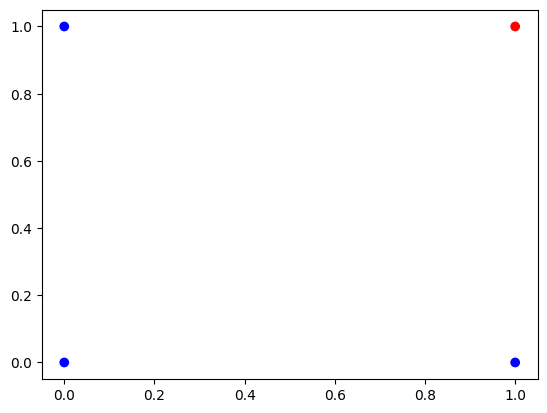

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

plt.scatter(x[:,0],x[:,1], c=y, cmap='bwr')


In [7]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(x,y)
y_pred = model.predict(x)
print(y_pred)

[0 0 0 1]


- เมื่อเราทำการเทรนโมเดลของ Neural Network โมเดลจะนำเอาข้อมูลมาเทรนทุกข้อมูล ทั้งชุดข้อมูล เป็นจำนวนหลายรอบ
- ซึ่ง แต่ละรอบที่ทำการเทรนครบทั้งชุดข้อมูล เราเรียกว่า `Epoch`

### แบบฝึกหัด 1
- ลองสร้าง Perceptron ที่ใช้แยกแยะข้อมูล `xor`

|x0|x1|y|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

#plt.scatter(x[:,0],x[:,1], c=y, cmap='bwr')

model = Perceptron()
model.fit(x,y)
print(model.predict(x))


[0 0 0 0]


List Activation Function

https://en.wikipedia.org/wiki/Activation_function

- ลองพิจารณาปัญหา

![alt text](https://drive.google.com/uc?export=download&id=1pMo0TMmw2tgllGYdOyF_s0OAbPIQqRLE)



***ปัญหาแบบนี้ เราเรียกว่า Linearly Inseparable Problems***

## Multi-layer Perceptron: MLP

- จากข้อจำกัดการใช้งาน `Perceptron` เราสามารถปรับปรุงให้ `Perceptron` มีความสามารถเพิ่มขึ้นได้โดยเพิ่มจำนวน `Perceptron`

![alt text](https://drive.google.com/uc?export=download&id=1kUbAufuDt5l4-LW_1UIwEKUfB51WElgx)

- และจากการใช้งาน `hardlim()` สำหรับ `activation function` แล้ว
- เรายังมี `activation function` อื่นๆอีก  [Activation Functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions)


## Backpropagation

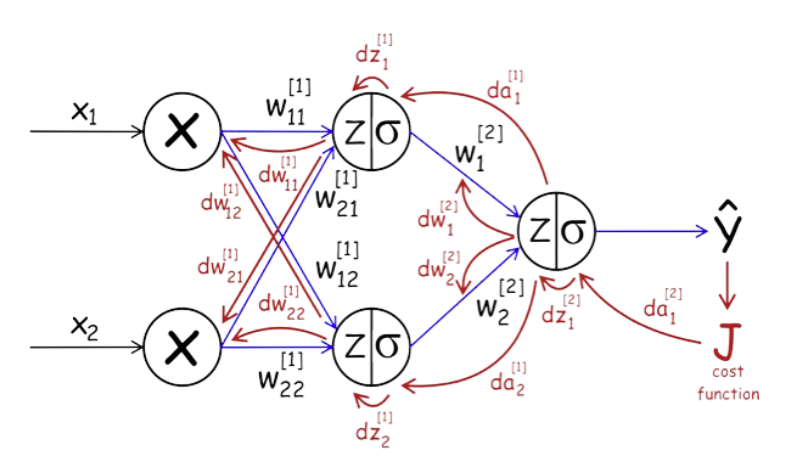

## Network Optimization

- ในกระบวนการเทรนของ Neural Network เราสามารถกำหนดค่าให้กับ $\alpha$ ได้
- แต่ปัญหาคือ ถ้าเรากำหนดให้ $\alpha$ มีค่าน้อยๆ model ของเราก็จะจำเป็นต้องเรียนรู้หลายๆรอบ
- แต่ถ้าเรากำหนดค่า $\alpha$ มากๆ เราอาจไม่สามารถทำให้ model ทำนายค่าได้ถูกต้อง

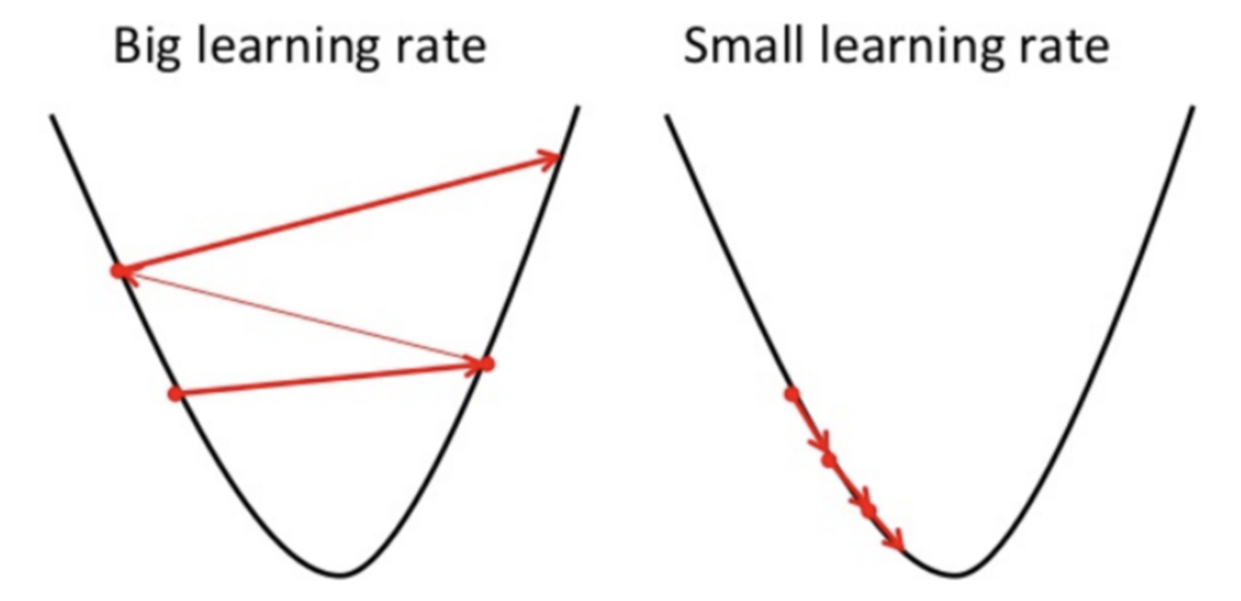

![alt text](https://drive.google.com/uc?export=download&id=1druDOcHBnyO2NmmEAIyApzkRdidB6lj_)


- ถ้าการปรับค่า $\alpha$ มันยาก แล้วเราจะทำอย่างไร ?
- ในการเทรน `Neoral Network` นั้น เราจะมีสิ่งหนึ่งเพิ่มเข้ามา เพื่อให้การเทรนนั้น มีประสิทธิภาพมากที่สุด (ให้ค่า loss ต่ำสุด และเร็วที่สุด)
- ในปัจจุบัน เรามี `optimizer` อยู่หลายตัว โดยตัวที่นิยมมากที่สุดคือ `Adam` จาก `Adam: A Method for Stochastic Optimization (Diederik Kingma and Jimmy Ba, 2015)`
- `Optimizer` อื่นๆ เช่น
 - Stochastic gradient descent (SGD)
 - Momentum
 - Nesterov accelerated gradient (NAD)
 - Adaptive Gradient (Adagrad)
 - Adaptive Learning Rate Method (Adadelta)
 - Root Mean Square Propagation (Rmsprop)

![alt text](https://drive.google.com/uc?export=download&id=1YaiyZ8yW8m3Sw2far1oVZ5GwTpDfH8sA)

##Tensorflow and Keras

- Tensorflow คือ Framework ที่ใช้สำหรับการสร้างโมเดล Neural Network
- ออกแบบโดย Google ในปี 2015
- โดยมีโครงสร้าง

![alt text](https://drive.google.com/uc?export=download&id=1KlGUyfnlDppb1FpL5bhSb1L7dtxXk4xH)


- จากตัวอย่างก่อนหน้า เราสามารถสร้างโมเดลของ `Neural Network` ได้ด้วย `sklearn` แล้วทำไมเราต้องการ `Tensorflow`?

- ข้อดีของ Tensorflow คือ การคำนวณแบบกราฟ และรองรับการคำนวณด้วย GPU หรือ TPU
- ทำให้ Tensorflow สามารถคำนวณได้อย่างรวดเร็ว

![alt text](https://drive.google.com/uc?export=download&id=1mMgChw42piQj1bIDKOd7k_hz6tWYGB2_)




- เราสามารถใช้งาน Tensorflow ได้โดยง่าย ผ่านทางแพตเกจย่อยที่ชื่อว่า Keras
- Keras เป็นแพคเกจเสริมที่สร้างบน Tensorflow อีกทีหนึ่ง
- โดยเราสามารถสร้างโมเดลของ Neural Network ได้โดย

11490434/11490434 [==============================] - 0s 0us/step


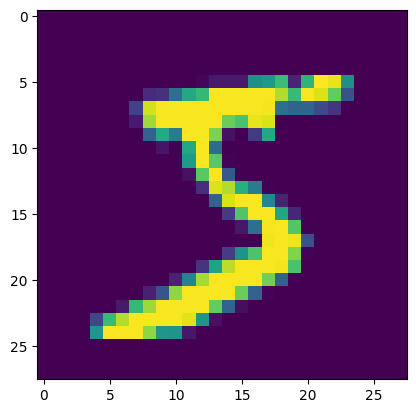

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])



In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[0])

In [11]:
print(y_train[0])

print(type(y_train))

print(np.unique(y_train))

5
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

x_train.shape

(60000, 784)

In [14]:
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


* ตัวอย่างการเข้ารหัส Output แบบ One-hot encoder


In [15]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Example categorical labels
labels = [0, 1, 2, 1, 0]

# Perform one-hot encoding
one_hot_encoded_labels = to_categorical(labels)

print("Original labels:", labels)
print("One-hot encoded labels:\n", one_hot_encoded_labels)

Original labels: [0, 1, 2, 1, 0]
One-hot encoded labels:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


[Parameters ในการ Compile Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [16]:
model = Sequential()

model.add(Dense(units=10, input_dim=x_train.shape[1]))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2)

loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 319.1913 - accuracy: 0.8421
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 317.7532 - accuracy: 0.8472
[317.753173828125, 0.8471999764442444]


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


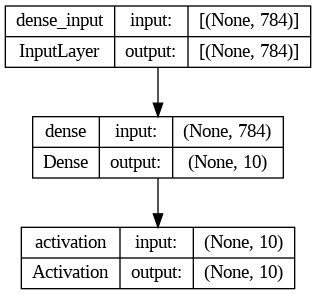

In [19]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')


##Shallow Network

- Shallow Network เป็นรูปแบบโครงสร้างหนึ่งของ Multi-layer Perceptron
- โดย Shallow Network นั้น จะเน้นที่การเพิ่มจำนวนของnode หรือ neuron ในแต่ละ hidden layer
- ทั่วไปแล้ว Shallow Network จะมีจำนวน Hidden Layer ไม่เกิน 3 Layers (หากมากกว่านั้น เราจะเรียกว่า Deep Neural Network หรือที่เราคุ้นเคยกันด้วยชื่อ Deep Learning)

![alt text](https://drive.google.com/uc?export=download&id=1zZzouOnQyOQ9sH8t-Qa3xybYb9aIgRiY)

- เราสามารถสร้าง Shallow Network ได้ด้วย Keras เหมือนตัวอย่างด้านบน เพียงแต่เพิ่มจำนวน node เข้าไปใน Hidden layer

170498071/170498071 [==============================] - 4s 0us/step


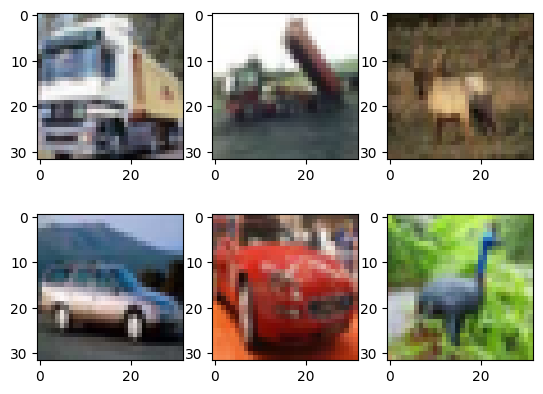

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy import misc

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(x_train[i])

- cifar10 คือ dataset สำหรับ Object Recognition in Images
- มีข้อมูลทั้งหมด  60,000 ภาพ ขนาด 32x32 Pixel
- มีจำนวนคลาส 10 คลาส

![alt text](https://drive.google.com/uc?export=download&id=1HgY2IIAGmPBzeChxqOSPCsWsqwCHn42X)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32, 32, 100)       400       
                                                                 
 flatten (Flatten)           (None, 102400)            0         
                                                                 
 dense_2 (Dense)             (None, 100)               10240100  
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 10251610 (39.11 MB)
Trainable params: 10251610 (39.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1

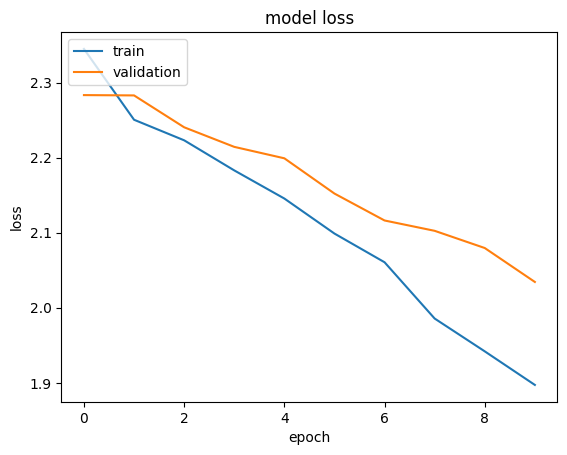

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# download cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# select first 300 images for train and next 100 images for validation
x = x_train[0:300]
y = y_train[0:300]
x_valid = x_train[300:400]
y_valid = y_train[300:400]


x, x_valid = x/255.0, x_valid/255.0

y = to_categorical(y)
y_valid = to_categorical(y_valid)

model = models.Sequential()
model.add(layers.Dense(100,input_shape=(32,32,3),activation='relu'))

#flatten == func in keras
model.add(layers.Flatten())

#layers Dense == fully connected sequential
#check activation func
model.add(layers.Dense(100,activation='sigmoid'))
model.add(layers.Dense(100,activation='sigmoid'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
H = model.fit(x,y,validation_data=(x_valid,y_valid),epochs=10)

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [22]:
import numpy as np

#Expand PIC to fit the dimension input of the model which were 32*32*100
model.predict(np.expand_dims(x_train[500], axis=0))

1/1 [==============================] - 0s 131ms/step


array([[0.04165982, 0.06358093, 0.12341327, 0.13195731, 0.10275555,
        0.07188408, 0.24522062, 0.09859487, 0.03561321, 0.0853203 ]],
      dtype=float32)

In [23]:
output = model.predict([x_train[500:501]/255.0])
output

1/1 [==============================] - 0s 79ms/step


array([[0.03365822, 0.08661567, 0.08400211, 0.12354124, 0.10700091,
        0.09488827, 0.2718648 , 0.09632992, 0.02466835, 0.07743046]],
      dtype=float32)

In [24]:
# np function; return max value as index (start from 0)
np.argmax(output[0])

6

In [25]:

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(x_test)

#return y_pred as index
y_pred = y_pred.argmax(axis=1)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


313/313 [==============================] - 9s 28ms/step
[[ 31 145  60   4   0   0  33   3 436 288]
 [ 20 350  35  12   8   0  69   5 127 374]
 [ 19 171 221  16   8   0 284   6 158 117]
 [ 20 256 192  35   6   0 249   5  64 173]
 [ 12 111 213  30   5   0 433  12  77 107]
 [ 20 318 195  39   4   0 269   7  59  89]
 [ 13 119 194  15   5   0 515   3  28 108]
 [  8 167 168  18  10   0 186  27  72 344]
 [ 16 159  16   4   1   0  15   1 371 417]
 [ 12 122  27   6   3   0  49   4 112 665]]
0.222


### แบบฝึกหัด 2

ลองสร้าง Shallow network เพื่อทำการเรียนรู้ข้อมูล mnist

1. นำเข้าข้อมูล mnist

In [26]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2. ตรวจสอบข้อมูล
 - ขนาดของข้อมูล
 - หน้าตาของข้อมูล input
 - หน้าตาของข้อมูล output


In [27]:
print(f'training input shape ={x_train.shape}')
print(f'target shape ={y_train.shape}')

training input shape =(60000, 28, 28)
target shape =(60000,)


In [28]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[0])

3. จากข้อ 2 เราต้องเข้ารหัส Output หรือไม่ ถ้าต้อง ให้ทำการเข้ารหัสในข้อนี้

In [29]:
y_train = to_categorical(y_train)

3. สร้างโมเดล Shallow Network ด้วย Keras โดย
 - กำหนดข้อมูล Input และ output ให้สอดคล้องกับชุดข้อมูล
 - กำหนดให้มี 2 hidden layer
 - แต่ละ layer มีจำนวน 200 nodes
 - Hidden layer -> Activation function = relu
 - Optimizer = Adam
 - Output layer -> Activation function = softmax
 - แสดงโครงสรา้งของ Network

In [30]:
#กำหนดข้อมูล Input และ output ให้สอดคล้องกับชุดข้อมูล
#กำหนดให้มี 2 hidden layer
#แต่ละ layer มีจำนวน 200 nodes

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [32]:
#Normalize to Balance Data

x_train = x_train/255.0
x_test = x_test/255.0

(60000, 784)

In [36]:
#Hidden layer -> Activation function = relu
#Output layer -> Activation function = softmax

model = Sequential()

model.add(Dense(200, input_dim =x_train.shape[1],activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))


#แสดงโครงสรา้งของ Network
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 200)               157000    
                                                                 
 dense_12 (Dense)            (None, 200)               40200     
                                                                 
 dense_13 (Dense)            (None, 10)                2010      
                                                                 
Total params: 199210 (778.16 KB)
Trainable params: 199210 (778.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#Optimizer = Adam

model.compile(optimizer='Adam',loss ='categorical_crossentropy',metrics =['accuracy'])

4. ทำการเทรน Network จำนวน 20 epochs พร้อมทั้งวาดกราฟเปรียบเทียบค่า loss

In [40]:
#comparing loss then it needs parameter for dcollecting output

H = model.fit(x_train,y_train,epochs=20, validation_split = 0.3)

Epoch 1/20
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1458 - accuracy: 0.9617 - val_loss: 0.2110 - val_accuracy: 0.9489
Epoch 2/20
1313/1313 [==============================] - 14s 11ms/step - loss: 0.1388 - accuracy: 0.9626 - val_loss: 0.2027 - val_accuracy: 0.9503
Epoch 3/20
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1165 - accuracy: 0.9689 - val_loss: 0.2008 - val_accuracy: 0.9549
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1161 - accuracy: 0.9697 - val_loss: 0.2198 - val_accuracy: 0.9558
Epoch 5/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1126 - accuracy: 0.9709 - val_loss: 0.2451 - val_accuracy: 0.9531
Epoch 6/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0965 - accuracy: 0.9744 - val_loss: 0.2339 - val_accuracy: 0.9590
Epoch 7/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0926 - accuracy: 0.9765 - val_loss: 0.1976 - val_accu

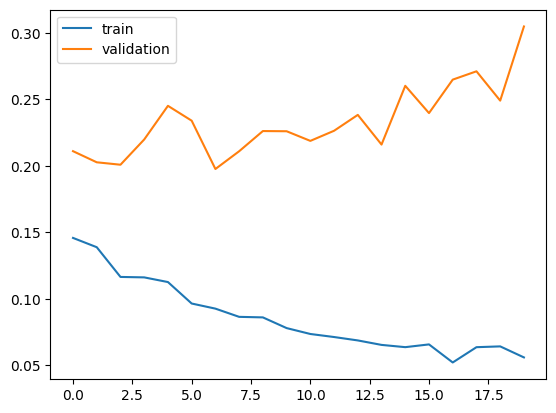

In [45]:
import matplotlib.pyplot as plt

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.legend(['train','validation'])

5. ทำนายข้อมูลด้วย test data

In [52]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
#y_pred = np.argmax(y_pred)

#argmax, need specific range axis
y_pred = y_pred.argmax(axis=1)

6. ทำการแปลงข้อมูลจากการทำนาย ให้เหมาะสม เพื่อทำการวาด Confusion matrix

In [54]:
from sklearn.metrics import classification_report

print(y_test.shape)
print(y_pred.shape)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


(10000,)
(10000,)
[[ 967    1    2    1    4    0    0    0    4    1]
 [   0 1127    2    2    0    2    2    0    0    0]
 [   7    3 1008    1    0    1    1    5    5    1]
 [   0    0    6  965    0   20    0    4   12    3]
 [   2    2    4    1  956    0    2    1    6    8]
 [   4    1    0    4    2  863    6    1   11    0]
 [   9    4    0    1    3    4  931    0    6    0]
 [   3    9   10    3    8    0    0  976    7   12]
 [  11    5    4    8    8    7    2    1  922    6]
 [   5    3    0    5   17    4    0    3   10  962]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.99      0.97      0.98       958
           7      

##Deep Neural Network


- Deep Neural Network (DNN) คือ Network ที่มี Hidden Layers มากกว่า 2 หรือ 3 Layers ขึ้นอยู่กับผู้นิยาม

### ทดลองใช้ DNN ในการ Classify ข้อมูล mnist

In [70]:
#Input library under Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f'Input shape = {x_train.shape}')
print(f'Output shape = {y_train.shape}')

Input shape = (60000, 28, 28)
Output shape = (60000,)


In [72]:
#input_layer would received keras workframe
input_layer = Input((x_train.shape[1], x_train.shape[2], 1))

#received input via input_layer #Input [28,28,1] >> Flatten [784]
x0 = Flatten()(input_layer)
#Input from x0, full connected layer with act Relu
x1 = Dense(100, activation='relu')(x0)
#Input from x1 >> x2; x2 >> x3 etc., full connected layer with act Relu
x2 = Dense(100, activation='relu')(x1)
x3 = Dense(100, activation='relu')(x2)
x4 = Dense(100, activation='relu')(x3)
output_layer = Dense(10, activation='softmax')(x4)

model = Model(input_layer, output_layer)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 10)                1010

In [73]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
x_train = x_train/255.0
x_test = x_test/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [75]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2875 - accuracy: 0.9148 - val_loss: 0.1754 - val_accuracy: 0.9486
Epoch 2/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1234 - accuracy: 0.9621 - val_loss: 0.1350 - val_accuracy: 0.9586
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0904 - accuracy: 0.9716 - val_loss: 0.1178 - val_accuracy: 0.9661
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0707 - accuracy: 0.9779 - val_loss: 0.1152 - val_accuracy: 0.9685
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.1097 - val_accuracy: 0.9696
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.1174 - val_accuracy:

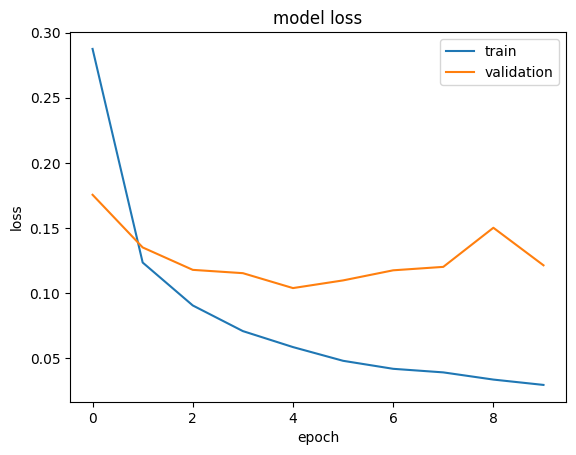

In [76]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

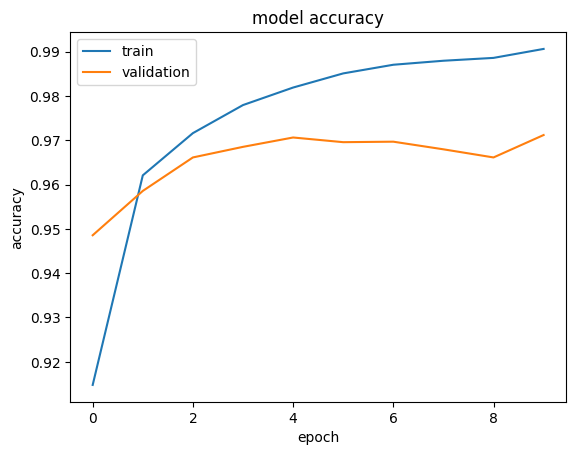

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model.predict(x_test)

#need to identify index of this matrix
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [79]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

#Meaning of Confustion Matrix;
# 24, [4,9] >> number 4 / 9, may be error
# 10, [3,5] >> number 3 / 5, may be error

Confusion Matrix:
[[ 966    0    1    2    0    0    5    2    2    2]
 [   0 1109    1    0    2    4    3    3   13    0]
 [   1    0 1012    5    3    1    2    6    2    0]
 [   0    0    6  967    0   20    0    4    6    7]
 [   0    1    3    0  961    0    7    4    3    3]
 [   3    0    0    2    1  870    8    1    3    4]
 [   4    2    1    1    2    2  946    0    0    0]
 [   2    0   10    2    0    1    0 1009    0    4]
 [   5    0    3    4    3    4    3    6  945    1]
 [   1    3    1    1   12    2    0   15    4  970]]
Accuracy Score:
0.9755
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.97   

###แบบฝึกหัด 3

ลองสร้าง Deep Neural network เพื่อทำการเรียนรู้ข้อมูล cifar10

1. นำเข้าข้อมูล cifar10

In [139]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

#Normalize Data

x_train = x_train/255.0
x_test = x_test/255.0


2. ตรวจสอบข้อมูล
 - ขนาดของข้อมูล
 - หน้าตาของข้อมูล input
 - หน้าตาของข้อมูล output

In [140]:
print(f'Train Input Shape ={x_train.shape}')
print(f'Train Output Shape {y_train.shape}')

print(f'test Input Shape ={x_test.shape}')
print(f'test Output Shape {y_test.shape}')

Train Input Shape =(50000, 32, 32, 3)
Train Output Shape (50000, 1)
test Input Shape =(10000, 32, 32, 3)
test Output Shape (10000, 1)


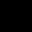

In [141]:
cv2_imshow(x_train[100])


[8]


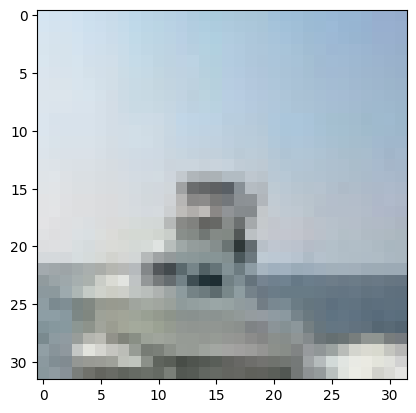

In [142]:
print(y_train[100])
plt.imshow(x_train[100])

3. จากข้อ 2 เราต้องเข้ารหัส Output หรือไม่ ถ้าต้อง ให้ทำการเข้ารหัสในข้อนี้

In [143]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

4. สร้างโมเดล Deep Network ด้วย Keras โดย
 - กำหนดข้อมูล Input และ output ให้สอดคล้องกับชุดข้อมูล
 - กำหนดให้มี 10 hidden layer
 - แต่ละ layer มีจำนวน 200 nodes
 - Hidden layer -> Activation function = relu
 - Optimizer = Adam
 - Output layer -> Activation function = softmax
 - แสดงโครงสร้างของ Network

In [144]:
#settling input layer to be shaped as raw data
#Check >> print(f'Train Input Shape ={x_train.shape}')

#Result >> Train Input Shape =(50000, 32, 32, 3)
# >> (No. Pic, pixel, pixel, dimention)

input_layer = Input((x_train.shape[1], x_train.shape[2], x_train.shape[3]))

x = Flatten()(input_layer)

#Hidden Layer x 10
#200 nodes each layer
#activation func Relu

x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)

#Output layer as softmax
output_layer = Dense(10, activation='softmax')(x)
model = Model(input_layer, output_layer)

#แสดงโครงสร้างของ Network
model.summary()


#Optimizer >> Adam
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_100 (Dense)           (None, 200)               614600    
                                                                 
 dense_101 (Dense)           (None, 200)               40200     
                                                                 
 dense_102 (Dense)           (None, 200)               40200     
                                                                 
 dense_103 (Dense)           (None, 200)               40200     
                                                                 
 dense_104 (Dense)           (None, 200)               402

4. ทำการเทรน Network จำนวน 20 epochs  พร้อมทั้งวาดกราฟเปรียบเทียบค่า loss

In [145]:
#epochs >> 20
history = model.fit(x_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1094/1094 [==============================] - 16s 13ms/step - loss: 2.0863 - accuracy: 0.1776 - val_loss: 2.0686 - val_accuracy: 0.2202
Epoch 2/20
1094/1094 [==============================] - 13s 11ms/step - loss: 1.9302 - accuracy: 0.2647 - val_loss: 1.9565 - val_accuracy: 0.2722
Epoch 3/20
1094/1094 [==============================] - 13s 11ms/step - loss: 1.8530 - accuracy: 0.3040 - val_loss: 1.8842 - val_accuracy: 0.3025
Epoch 4/20
1094/1094 [==============================] - 14s 13ms/step - loss: 1.8075 - accuracy: 0.3233 - val_loss: 1.8195 - val_accuracy: 0.3315
Epoch 5/20
1094/1094 [==============================] - 13s 12ms/step - loss: 1.7813 - accuracy: 0.3368 - val_loss: 1.7708 - val_accuracy: 0.3437
Epoch 6/20
1094/1094 [==============================] - 13s 12ms/step - loss: 1.7413 - accuracy: 0.3536 - val_loss: 1.7276 - val_accuracy: 0.3636
Epoch 7/20
1094/1094 [==============================] - 13s 12ms/step - loss: 1.7081 - accuracy: 0.3743 - val_loss: 1.7004 -

5. ทำนายข้อมูลด้วย test data

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


6. ทำการแปลงข้อมูลจากการทำนาย ให้เหมาะสม เพื่อทำการวาด Confusion matrix

In [147]:
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [148]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[570  24  47  12  26  14  20  62 200  25]
 [ 88 524   7  18  16  26  24  44 107 146]
 [137  19 213  40 177 132 109 118  48   7]
 [ 51  19  79 177  52 264 148 120  68  22]
 [ 88   4 120  26 355  79 127 160  37   4]
 [ 41  11  76 114  54 408  90 124  72  10]
 [ 12  12  87  71 163  67 496  63  19  10]
 [ 90   9  28  28  83  94  24 586  32  26]
 [145  56  12  13  15  21   7  23 660  48]
 [ 95 169   4  28  14  20  25 110 112 423]]
              precision    recall  f1-score   support

           0       0.43      0.57      0.49      1000
           1       0.62      0.52      0.57      1000
           2       0.32      0.21      0.25      1000
           3       0.34      0.18      0.23      1000
           4       0.37      0.35      0.36      1000
           5       0.36      0.41      0.38      1000
           6       0.46      0.50      0.48      1000
           7       0.42      0.59      0.49      1000
           8       0.49      0.66      0.56      1000
           9       0.59     

##Different types of artificial neural network

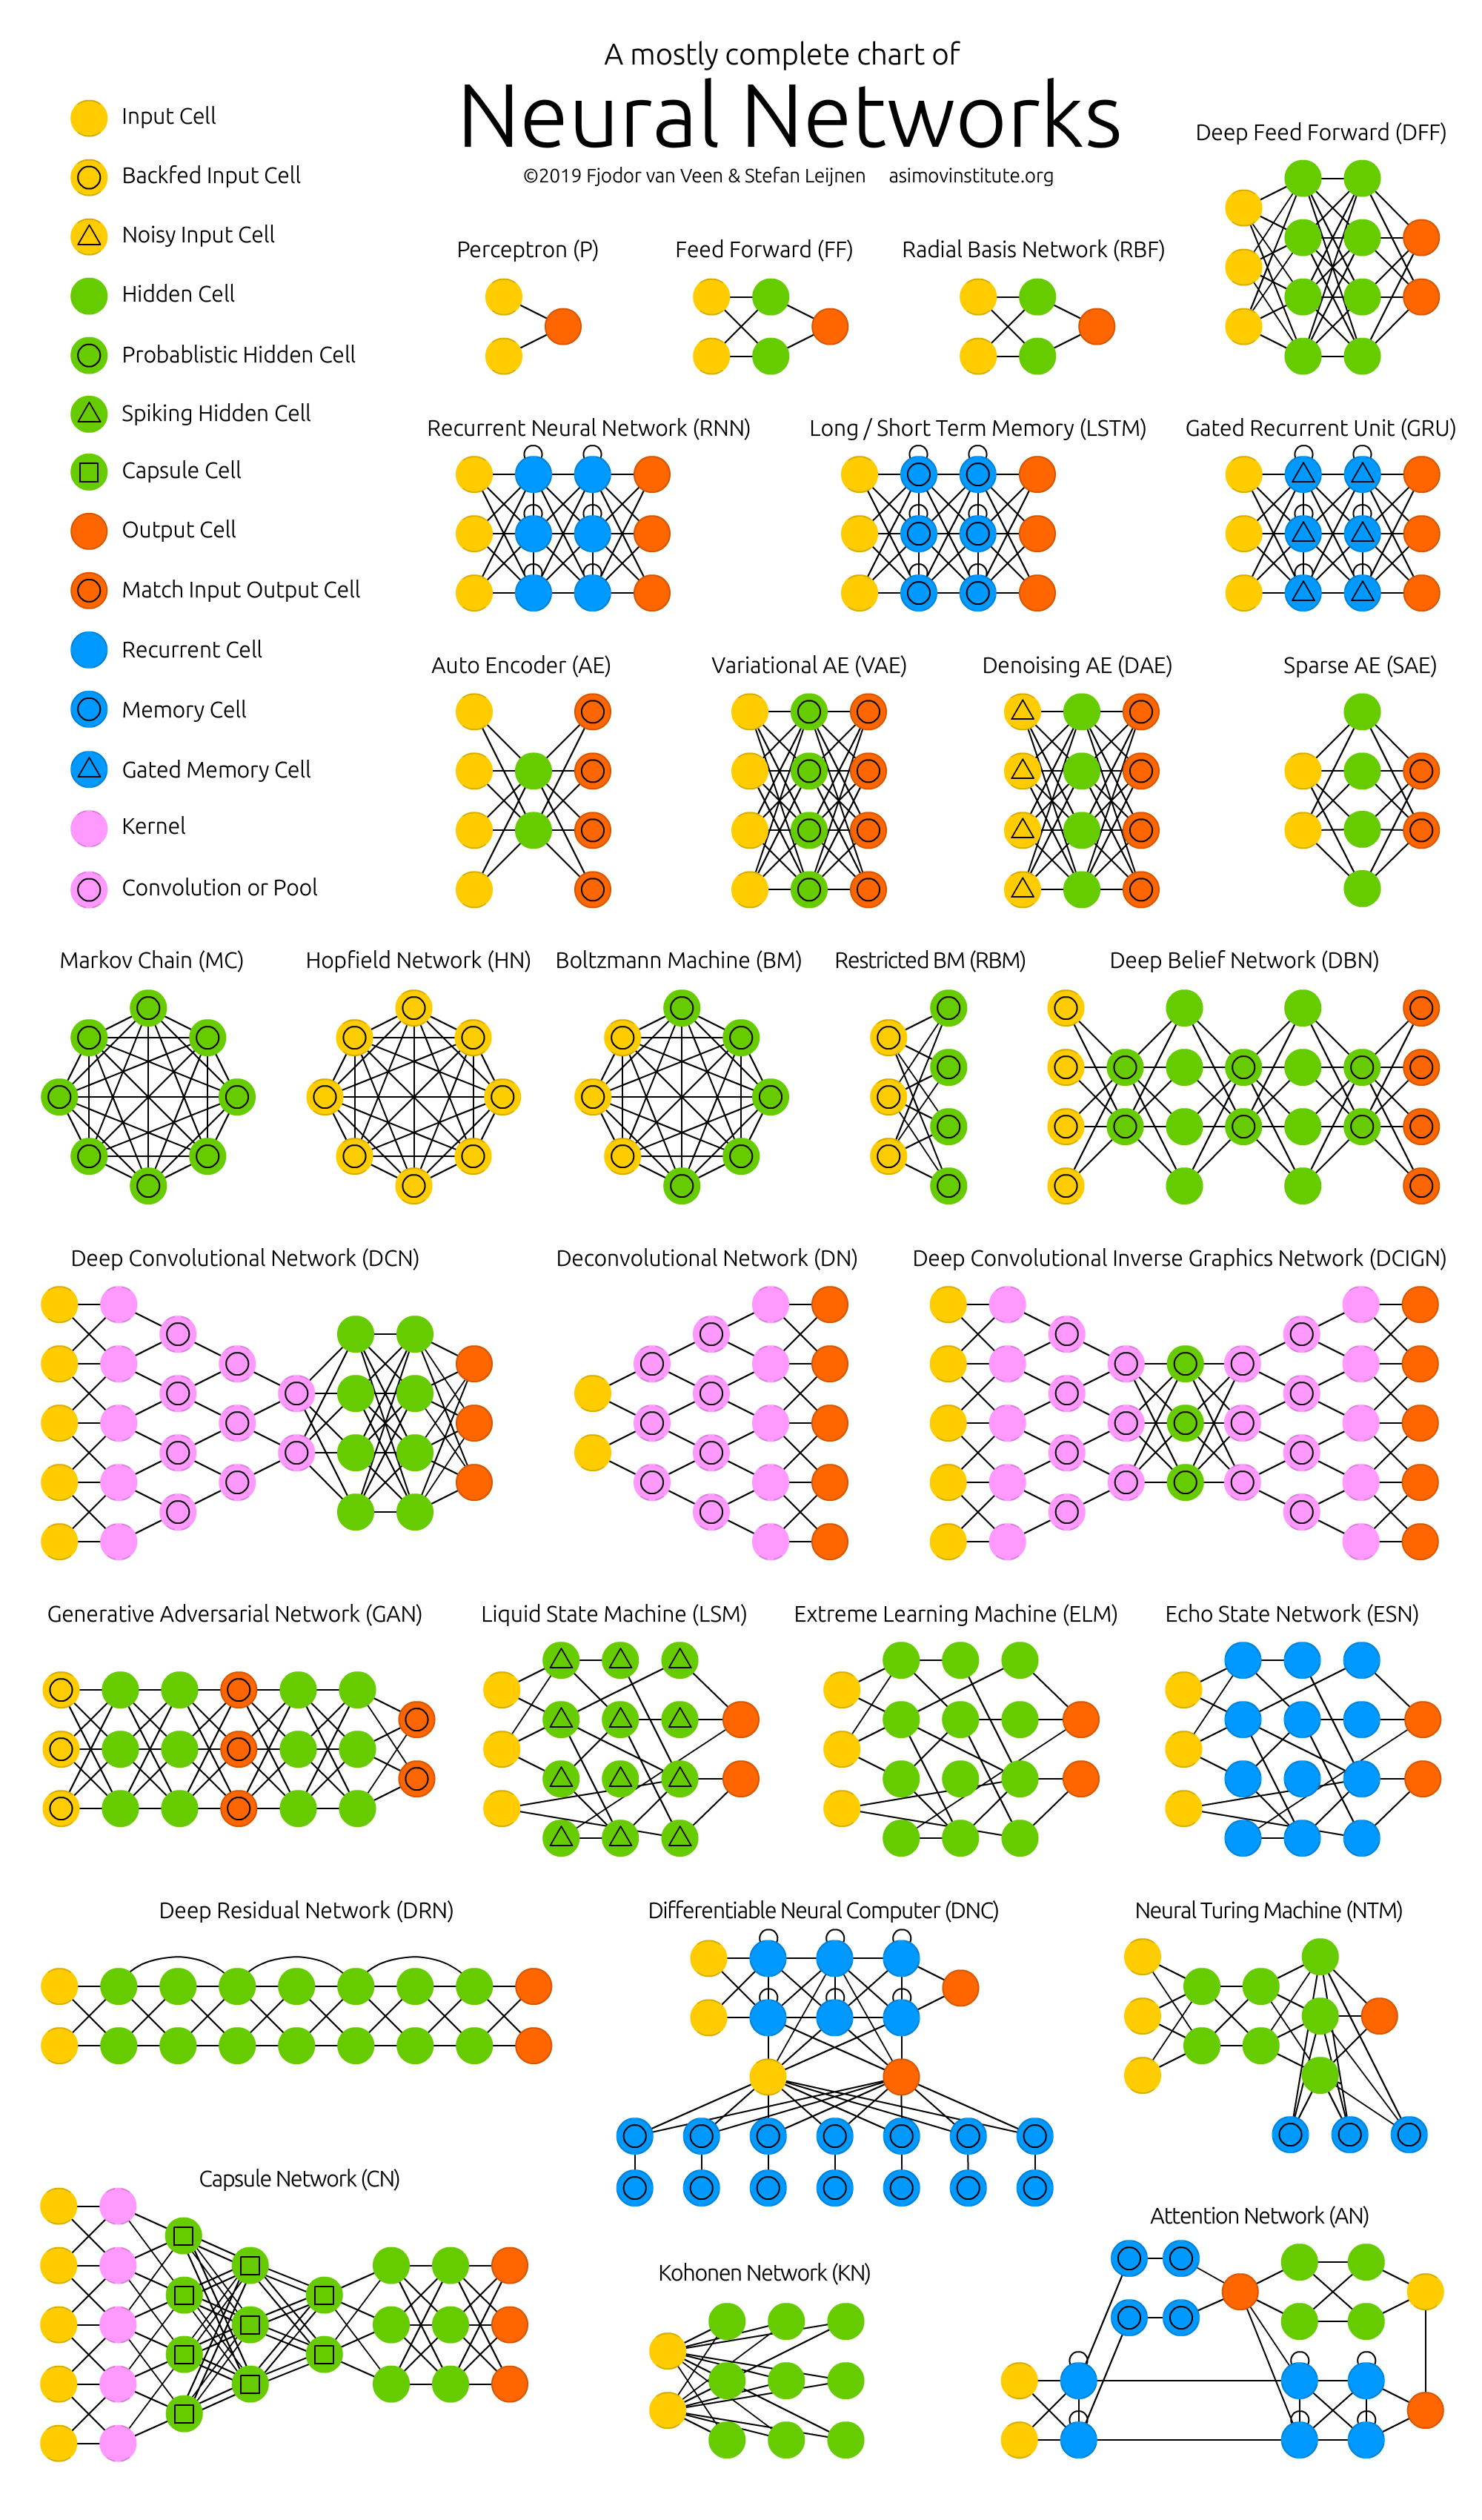

## Convolutional Neural Network (CNN)

![alt text](https://drive.google.com/uc?export=download&id=1Ly7UhKoEXcdHVTphXXYv0hWhdIUuhz87)

![alt text](https://drive.google.com/uc?export=download&id=1LTM4g_Grvi33q_kifWg4O4TVt3m_eNX8)

### CNN simple Architecture

![alt text](https://drive.google.com/uc?export=download&id=1o7RNYNUT3LOYPpxHkHPz-1dpUu3WQWVj)

### Pooling layer

![alt text](https://drive.google.com/uc?export=download&id=1sLUTdIm7t8dOdeGmi6kc0tjGAW3HpNra)


ทดลองสร้าง CNN Model เพื่อจำแนกรูปภาพ สุนัข และ แมว

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [150]:
!git clone https://github.com/ki-ljl/cnn-dogs-vs-cats.git

Cloning into 'cnn-dogs-vs-cats'...
remote: Enumerating objects: 1479, done.
remote: Counting objects: 100% (1479/1479), done.
remote: Compressing objects: 100% (1456/1456), done.
remote: Total 1479 (delta 31), reused 1458 (delta 18), pack-reused 0
Receiving objects: 100% (1479/1479), 32.95 MiB | 30.70 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [151]:
import os

path = 'cnn-dogs-vs-cats/data'
os.listdir(path)

['training_data', 'testing_data']

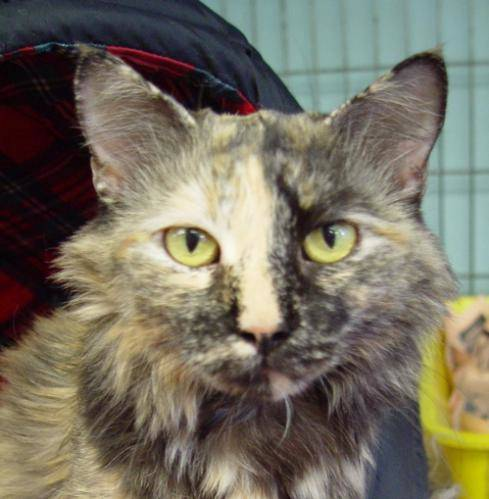

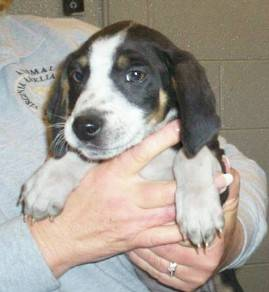

In [153]:
import cv2
from google.colab.patches import cv2_imshow

cat = cv2.imread(os.path.join(path,'training_data/cats/cat.10.jpg'))
cv2_imshow(cat)

dog = cv2.imread(os.path.join(path,'training_data/dogs/dog.10.jpg'))
cv2_imshow(dog)


In [156]:
import cv2
import numpy as np

# Function to load and preprocess images
def load_and_preprocess_images(directory, img_size, label):

    #Create blank frame
    images = []
    labels = []

    for filename in os.listdir(directory):

        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)

        #reshape input size
        img = cv2.resize(img, img_size)

        #Normalize
        img = img.astype('float32') / 255.0

        #append data in blank set
        images.append(img)
        labels.append(label)

    #Return as np array
    return np.array(images), np.array(labels)


In [157]:
# Define the paths to your 'cat' and 'dog' directories
cat_dir = 'cnn-dogs-vs-cats/data/training_data/cats'
dog_dir = 'cnn-dogs-vs-cats/data/training_data/dogs'

# Specify image size
#Setling at size 64x64, can be larger or smller
img_size = (64, 64)

# Load 'cat' images
X_cat, y_cat = load_and_preprocess_images(cat_dir, img_size, label=0)

# Load 'dog' images
X_dog, y_dog = load_and_preprocess_images(dog_dir, img_size, label=1)

# Concatenate features and labels
#Connected data cat & dog
X = np.concatenate([X_cat, X_dog])
y = np.concatenate([y_cat, y_dog])

# Convert labels to categorical format
y = to_categorical(y, num_classes=2)

In [158]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Start Layer
model = Sequential()

#Kernel as input
#Convolution+ReLu-1, 32 layers 3x3
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))

#added pooling, 2x2 >> padding to reduce size from Pooling-1 devided by 2
model.add(MaxPooling2D((2, 2)))

#Convolution+ReLu-2, 64 layers 3x3 +Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Convolution+ReLu-3, 64 layers 3x3 +Pooling
model.add(Conv2D(64, (3, 3), activation='relu'))

#Flatten by Keras
model.add(Flatten())

#Fully connected layer, 64 nodes, w/ ReLu
model.add(Dense(64, activation='relu'))

#Output, 2 nodes with softmax
model.add(Dense(2, activation='softmax'))

#Show neural network
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_12 (Flatten)        (None, 9216)             

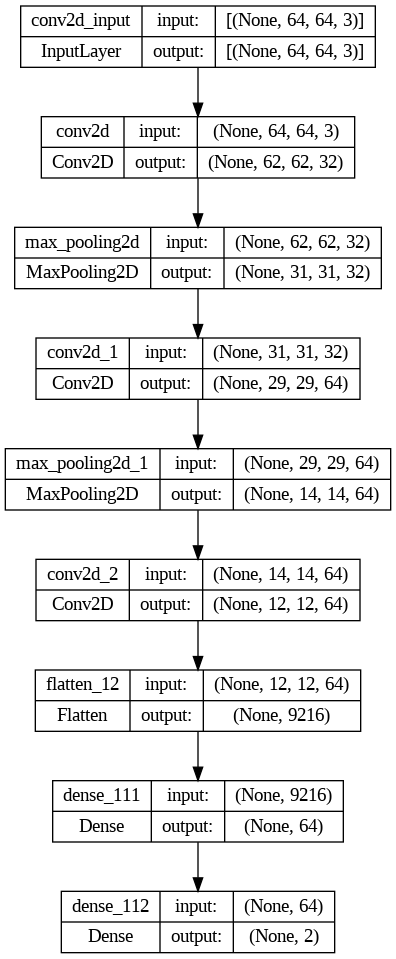

In [159]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes=True,
           show_layer_names=True)

Image('model_plot.png')

In [173]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

H = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 7s 192ms/step - loss: 0.0557 - accuracy: 0.9800 - val_loss: 1.9711 - val_accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 3s 129ms/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 2.6566 - val_accuracy: 0.5500
Epoch 3/100
25/25 [==============================] - 4s 156ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 2.6418 - val_accuracy: 0.5500
Epoch 4/100
25/25 [==============================] - 3s 138ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.9795 - val_accuracy: 0.5500
Epoch 5/100
25/25 [==============================] - 3s 130ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.1199 - val_accuracy: 0.5600
Epoch 6/100
25/25 [==============================] - 3s 125ms/step - loss: 6.9718e-04 - accuracy: 1.0000 - val_loss: 3.6679 - val_accuracy: 0.5400
Epoch 7/100
25/25 [==============================] - 6s 230ms/step - loss: 5.3000e-04 - accuracy: 1.0000 - val_loss: 3.6125 - val_accuracy

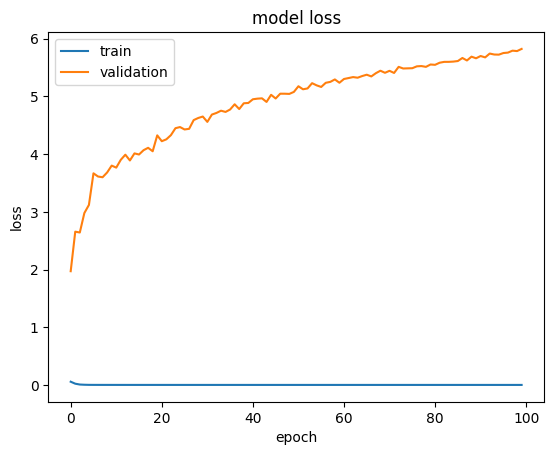

In [174]:
#Model result

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [175]:
#Loading testing data
#same method as pre-process in training data

cat_dir_test = 'cnn-dogs-vs-cats/data/testing_data/cats'
dog_dir_test = 'cnn-dogs-vs-cats/data/testing_data/dogs'

img_size = (64, 64)

X_cat_test, y_cat_test = load_and_preprocess_images(cat_dir, img_size, label=0)

X_dog_test, y_dog_test = load_and_preprocess_images(dog_dir, img_size, label=1)

#concatenate data dog&cat
X_test = np.concatenate([X_cat_test, X_dog_test])
y_test = np.concatenate([y_cat_test, y_dog_test])

#Predict
y_pred = model.predict(X_test)

32/32 [==============================] - 1s 32ms/step


In [176]:
#assign y_pred as index
y_pred = y_pred.argmax(axis=1)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[500   0]
 [ 90 410]]
0.91


In [179]:
import requests
from PIL import Image

# Replace with the actual URL of your JPEG image
image_url = 'https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg'

# Download the image using requests
response = requests.get(image_url)

# Open the image using PIL
image = Image.open(response.raw)

# Display the image (optional)
image.show()

# Save the image to a local file (optional)
image.save('cat.jpg')


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f7b2cdb7790>

In [ ]:

img = cv2.imread('cat.jpg')
cv2_imshow(img)

img = cv2.resize(img, img_size)
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)

predictions = model.predict(img)

predicted_label = np.argmax(predictions)

class_mapping = {0: 'Cat', 1: 'Dog'}
predicted_class = class_mapping[predicted_label]

print(f'The model predicts: {predicted_class}')


###แบบฝึกหัด 4

ลองสร้าง CNN เพื่อทำการจำแนกรูปภาพลูกลอบสำหรับกีฬาต่างๆ

In [172]:
!git clone https://github.com/pingkung/SmallSportsBallsDataset.git

Cloning into 'SmallSportsBallsDataset'...
remote: Enumerating objects: 4020, done.
remote: Total 4020 (delta 0), reused 0 (delta 0), pack-reused 4020
Receiving objects: 100% (4020/4020), 202.30 MiB | 33.40 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (4002/4002), done.


##Other purposes for using Neural Network

- นอกจากจะสามารถใช้ Neural Network ในการทำ Regression และ Classification แล้ว
- Neural Network ยังสามารถนำไปใช้ด้วยจุดประสงค์อื่นได้อีก เช่น

### Feature Extraction

- เราสามารถนำ Neural Network มาใช้ทำ Feature Extraction ได้โดยการกำหนดโครงสร้างดังนี้

![alt text](https://drive.google.com/uc?export=download&id=1GAFiVDw7ijnqoDXjMQQxdaMKGDdUBJG0)

###Super Resolution

- การทำ Super Resolution คือการพยายามทำให้ภาพที่ไม่มีความคมชัด กลับมาคมชัดอีกครั้ง

![alt text](https://drive.google.com/uc?export=download&id=1IpoavVEzdFL1a_QYiqYaWjZxNWoF3l2H)

- ซึ่งเราสามารถประยุกต์ใช้ Convolutional Neural Network เข้ามาช่วยได้

![alt text](https://drive.google.com/uc?export=download&id=1y1PAOxxV1eXxA-UAGMKfLNGmbx1zAzGL)

###Generative Adversarial Network (GAN)

![alt text](https://drive.google.com/uc?export=download&id=10aEBQTn483cN9H5sXfFPmg9ortW_YThE)

## U-NET Image Segmentation

U-NET เป็นโครงสร้าง CNN ที่ถูกพัฒนาโดย Olaf Ronneberger และคณะผู้จัดทำสำหรับการ Segmentation ทางชีวการแพทย์ในปี 2015 ณ มหาวิทยาลัย Freiburg, เยอรมนี มันเป็นหนึ่งในวิธีการที่ได้รับความนิยมมากที่สุดในงาน Segmentation

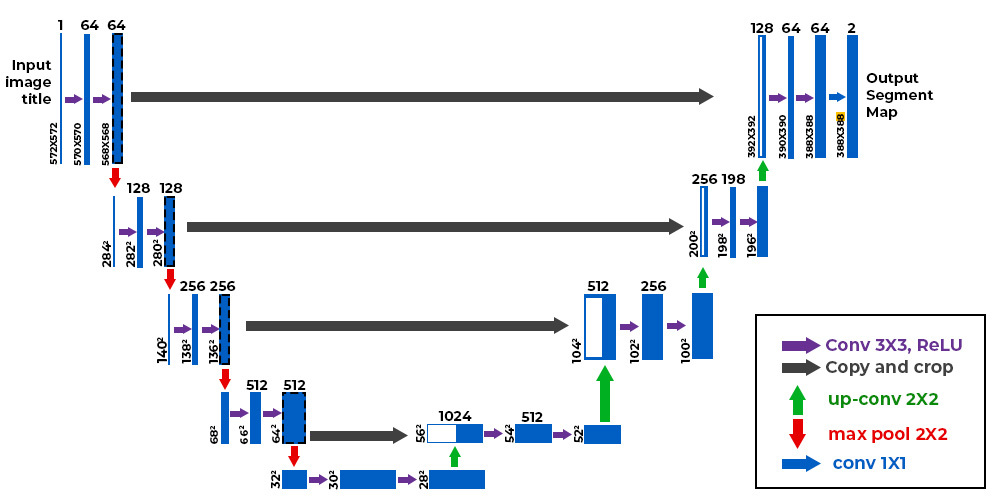

## อื่นๆ เกี่ยวกับ Neural Network

- Multi Network

![alt text](https://drive.google.com/uc?export=download&id=1DYFOh0BTJ7A8B3w71oJbucj0d-n_ba6m)

- Data Augmentation
 - Image Translation
 - Image Rotation
 - Changes in Scale
 - Shearing
 - Horizontal Flips

![alt text](https://drive.google.com/uc?export=download&id=1wkv22IKFDZxFvU5XG6-DGcWTDC1HC5Z4)


- Underfitting VS Overfitting
- Rule of Training
 - ลด Training loss ให้ได้มากที่สุด
 - ลดช่องว่างระหว่าง Training loss และ Validation loss

 ![alt text](https://drive.google.com/uc?export=download&id=1d9wriPK3W0M3b6uXfXD9amt57-cC-Qzm)

- Early Stopping + Checkpointing


```
EarlyStopping(monitor='val_loss', mode='min')
EarlyStopping(monitor='val_acc', mode='max')
```

 - Pre-trained Model, Transfer Learning and Fine-tune
  - LeNet, AlexNet, VGG, GoogLeNet, ResNet and more ….

- K-Fold Cross-Validation

  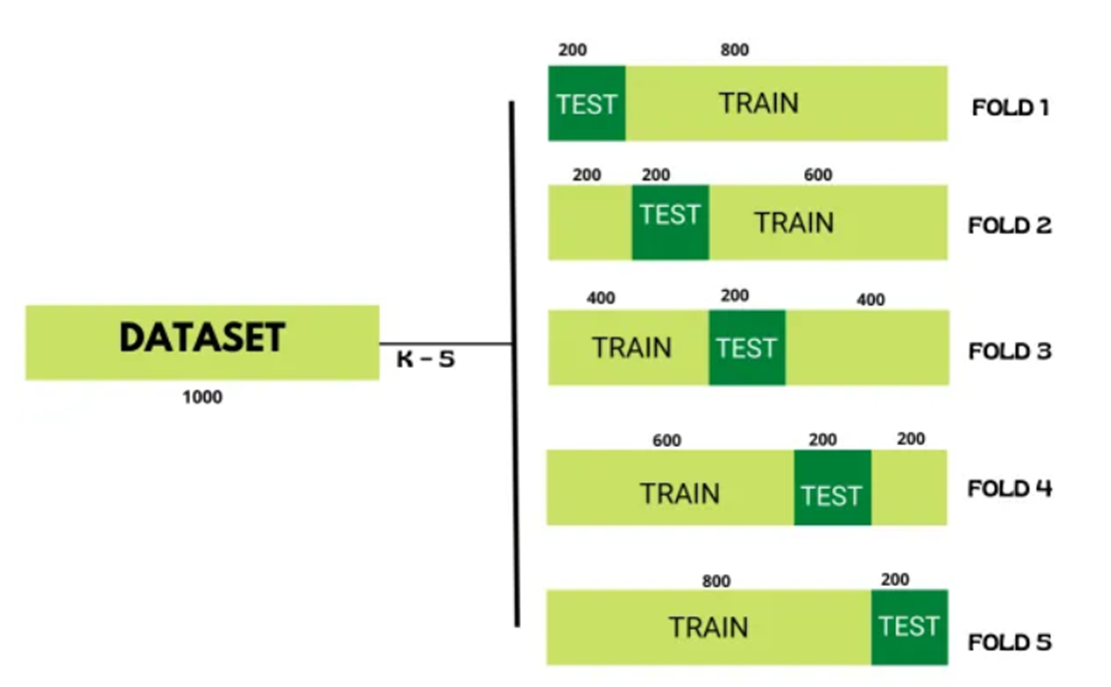
  